# Part I - (Ford GoBike System Data Exploration)
## By Adewunmi Giwa

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Only data for the month of Feburary, 2019 was provided in the classroom, however, I went ahead to obtain links to monthly datasets from January to December, 2019 from this lnk: https://s3.amazonaws.com/baywheels-data/index.html

> I programatically downloaded the zipfiles containing the dataset for each month using os and requests libraries. Thereafter, I extracted the dataset from each file. I then merged all monthly datasets into one single csv fle. 

## Preliminary Wrangling


In [1]:
#import relevant libraries and packages 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
from zipfile import ZipFile
from io import BytesIO
!pip install geopy
from geopy import distance

In [2]:
#save links for data collected each month in a list
go_bike_urls = ['https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip']

In [3]:
# Download all files
#reference: https://github.com/Monicajhe/Ford-GoBike-Data-Exploration/blob/main/Ford%20GoBike%20Data%20Exploration.ipynb
for url in go_bike_urls:
    reponse = requests.get(url)
    zip_file = ZipFile(BytesIO(reponse.content))    
    zip_file.extractall()

In [4]:
# merge all csv files into one
df = pd.concat(
    map(pd.read_csv, ['201901-fordgobike-tripdata.csv', '201902-fordgobike-tripdata.csv', '201903-fordgobike-tripdata.csv',
                                 '201904-fordgobike-tripdata.csv','201905-baywheels-tripdata.csv','201906-baywheels-tripdata.csv',
                                 '201907-baywheels-tripdata.csv','201908-baywheels-tripdata.csv','201909-baywheels-tripdata.csv',
                                 '201910-baywheels-tripdata.csv','201911-baywheels-tripdata.csv','201912-baywheels-tripdata.csv']), ignore_index=True, sort = False)
df.sample(5)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
2164686,395,2019-10-01 17:55:22.8610,2019-10-01 18:01:58.0040,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,3049,Customer,No,NaN
1912228,464,2019-09-04 12:54:20.8020,2019-09-04 13:02:05.6340,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,74.0,Laguna St at Hayes St,37.776435,-122.426244,10411,Customer,No,NaN
851911,438,2019-04-03 06:50:08.2900,2019-04-03 06:57:27.0970,168.0,Alcatraz Ave at Shattuck Ave,37.849595,-122.265569,246.0,Berkeley Civic Center,37.869060,-122.270556,5787,Subscriber,No,NaN
2224444,678,2019-11-19 17:14:41.9180,2019-11-19 17:25:59.9260,163.0,Lake Merritt BART Station,37.797320,-122.265320,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,2776,Subscriber,No,NaN
1549782,1006,2019-08-25 12:50:43.0590,2019-08-25 13:07:29.4030,19.0,Post St at Kearny St,37.788975,-122.403452,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,10101,Customer,No,NaN


In [5]:
#create copy of dataset
df=df.copy()

#save df.copy as bike_df
bike_df=df.copy()

#explore preperties of bike_df
print(bike_df.shape)
print(bike_df.info())

(2506983, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB
None


In [6]:
#check for duplicated rows
print(bike_df.duplicated().sum())

#check for missing values
print(bike_df.isnull().sum())

0
duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64


### What is the structure of your dataset?

> The dataset has 2506983 observations and 15 variables

### What is/are the main feature(s) of interest in your dataset?

>       1. When are most trips taken in terms of time of day, day of the week, or month of the year?
      2. How long does the average trip take?
      3. What is the average distance travelled?
      4. Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_time, duration_sec, user_type, latitude and longitude columns

### Data Wranglng Steps
>   
  * convert dtype of 'start_time' to datetime object
  * split start_time into date and ttime columns
  * extract day and month from start_time column
  * extract hour from start_time column
  * convert 'hour' column into int dtype
  * drop irrelevant columns
  * drop rows containing missing values
  * get distance in km from latitude and longitude columns

In [7]:
#convert dtype of 'start_time' to datetime object
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])

In [8]:
#split start_time into 'date' and 'ttime' columns
bike_df['start_ttime'] = bike_df['start_time'].dt.strftime('%H:%M')
bike_df['start_date'] = bike_df['start_time'].dt.strftime('%Y-%m-%d')

#extract 'hour' from start_time column
bike_df['start_hour'] = bike_df['start_time'].dt.strftime('%H')
bike_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_ttime,start_date,start_hour
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,17:57,2019-01-31,17
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,20:58,2019-01-31,20
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,18:06,2019-01-31,18
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,19:46,2019-01-31,19
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,14:19,2019-01-31,14


In [9]:
#extract day from start_time column
bike_df['start_day']=bike_df['start_time'].dt.day_name()

#extract month from start_time column
bike_df['start_month']=bike_df['start_time'].dt.month_name()

bike_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_ttime,start_date,start_hour,start_day,start_month
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,17:57,2019-01-31,17,Thursday,January
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,20:58,2019-01-31,20,Thursday,January
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,18:06,2019-01-31,18,Thursday,January
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,19:46,2019-01-31,19,Thursday,January
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,14:19,2019-01-31,14,Thursday,January


In [10]:
#convert 'start_hour' to int dtype
bike_df['start_hour'] = bike_df['start_hour'].astype('int')

#convert dtype of start_date, start_ttime columns into datetime object
bike_df['start_ttime'] = pd.to_datetime(bike_df['start_ttime'])
bike_df['start_date'] = pd.to_datetime(bike_df['start_date'])

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 20 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
start_ttime                datetime64[ns]
start_date                 datetime64[ns]
start_hour                 int64
start_day                  object
start_month                object
dtypes: datetime64[ns](3), float64(6), int64(3), object(8)
memory usage: 382.5+ MB


In [11]:
#calculate distance travelled from latitude and longitude columns
#reference: https://www.appsloveworld.com/pandas/100/434/calculating-the-distance-between-2-sets-of-lat-long-coordinates-with-pandas-and-g
def dist_calc (row):
    start = (row['start_station_latitude' ], row['start_station_longitude'])
    stop = (row['end_station_latitude'], row['end_station_longitude'])
    return distance.great_circle(start, stop).km
bike_df['distance_km'] = bike_df.apply (lambda row: dist_calc (row), axis=1)
bike_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_ttime,start_date,start_hour,start_day,start_month,distance_km
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,...,4861,Subscriber,No,NaN,2022-10-17 17:57:00,2019-01-31,17,Thursday,January,5.305207
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,...,5506,Subscriber,No,NaN,2022-10-17 20:58:00,2019-01-31,20,Thursday,January,3.859634
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,...,2717,Customer,No,NaN,2022-10-17 18:06:00,2019-01-31,18,Thursday,January,3.287103
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,...,4557,Customer,No,NaN,2022-10-17 19:46:00,2019-01-31,19,Thursday,January,0.999634
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,...,2100,Customer,No,NaN,2022-10-17 14:19:00,2019-01-31,14,Thursday,January,0.953356


In [12]:
#drop irrelevant columns
bike_df = bike_df.drop(columns=['start_time', 'end_time', 'bike_share_for_all_trip', 'rental_access_method', 
                                'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
duration_sec               int64
start_station_latitude     float64
start_station_longitude    float64
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
start_ttime                datetime64[ns]
start_date                 datetime64[ns]
start_hour                 int64
start_day                  object
start_month                object
distance_km                float64
dtypes: datetime64[ns](2), float64(5), int64(3), object(3)
memory usage: 248.6+ MB


In [13]:
#rename 'start_ttime' column
bike_df.rename(columns = {'start_ttime':'start_time'}, inplace = True)
bike_df.head(5)

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,start_time,start_date,start_hour,start_day,start_month,distance_km
0,80825,37.775745,-122.213037,37.808894,-122.256460,4861,Subscriber,2022-10-17 17:57:00,2019-01-31,17,Thursday,January,5.305207
1,65900,37.785881,-122.408915,37.752428,-122.420628,5506,Subscriber,2022-10-17 20:58:00,2019-01-31,20,Thursday,January,3.859634
2,62633,37.870139,-122.268422,37.846784,-122.291376,2717,Customer,2022-10-17 18:06:00,2019-01-31,18,Thursday,January,3.287103
3,44680,37.770083,-122.429156,37.775946,-122.437777,4557,Customer,2022-10-17 19:46:00,2019-01-31,19,Thursday,January,0.999634
4,60709,37.794130,-122.394430,37.787168,-122.388098,2100,Customer,2022-10-17 14:19:00,2019-01-31,14,Thursday,January,0.953356


In [14]:
#remove latitude and longitude columns
bike_df = bike_df.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 9 columns):
duration_sec    int64
bike_id         int64
user_type       object
start_time      datetime64[ns]
start_date      datetime64[ns]
start_hour      int64
start_day       object
start_month     object
distance_km     float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 172.1+ MB


In [15]:
#check for missing values and duplicated rows
print(bike_df.duplicated().sum())
print(bike_df.isnull().sum())

0
duration_sec    0
bike_id         0
user_type       0
start_time      0
start_date      0
start_hour      0
start_day       0
start_month     0
distance_km     0
dtype: int64


### New Data Structure: 2506983 observations, 9 observations

## Univariate Exploration

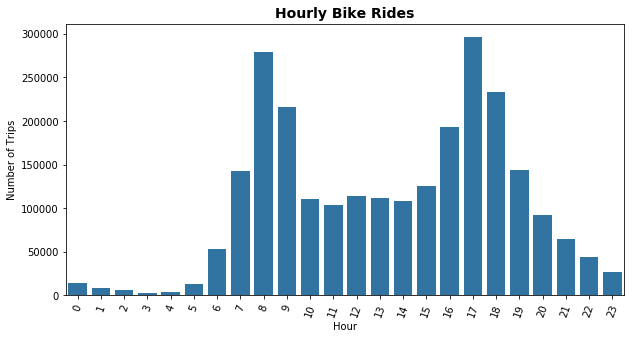

In [16]:
#when were most trips taken in terms of time of day?
plt.figure(figsize=[10,5]);
base_color= sb.color_palette()[0]
sb.countplot(data= bike_df, x='start_hour', color= base_color);
plt.xticks(rotation= 70);
plt.xlabel('Hour');
plt.ylabel('Number of Trips');
plt.title('Hourly Bike Rides', fontsize=14, fontweight='bold');

**Observations**
* Highest number of trips were taken around 5pm (17:00 to 17:59)
* Second highest number of trips were taken around 8am (8:00 to 8:59)
* The least number of trips were taken between 3 and 4am

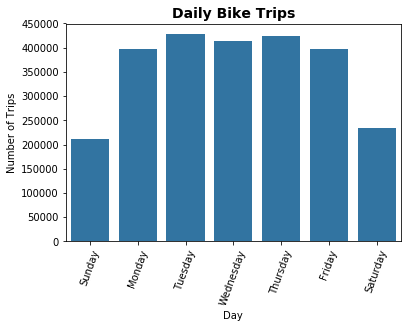

In [17]:
#when were most trips taken in terms of day of week?
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_week = pd.api.types.CategoricalDtype(ordered = True, categories = days)
bike_df['start_day']= bike_df['start_day'].astype(day_of_week)

sb.countplot(data=bike_df, x='start_day', color= base_color);
plt.xticks(rotation= 70);
plt.xlabel('Day');
plt.ylabel('Number of Trips');
plt.title('Daily Bike Trips', fontsize=14, fontweight='bold');

**Observations**
* Most bike trips were taken on a Tuesday, followed closely by a Thursday
* The least number of bike trips were taken on a Sunday

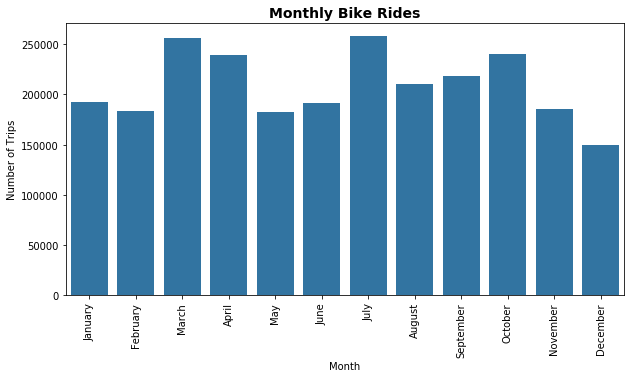

In [18]:
#when were most trips taken in terms of month of year?
plt.figure(figsize=[10,5])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_of_year = pd.api.types.CategoricalDtype(ordered = True, categories = months)
bike_df['start_month']= bike_df['start_month'].astype(months_of_year);

sb.countplot(data= bike_df, x='start_month', color= base_color);
plt.xticks(rotation= 90);
plt.xlabel('Month');
plt.ylabel('Number of Trips');
plt.title('Monthly Bike Rides', fontsize=14, fontweight='bold');

**Observations**
* Most bike trips were taken in July, followed closely by March, followed by April
* The least number of bike trips were taken in December

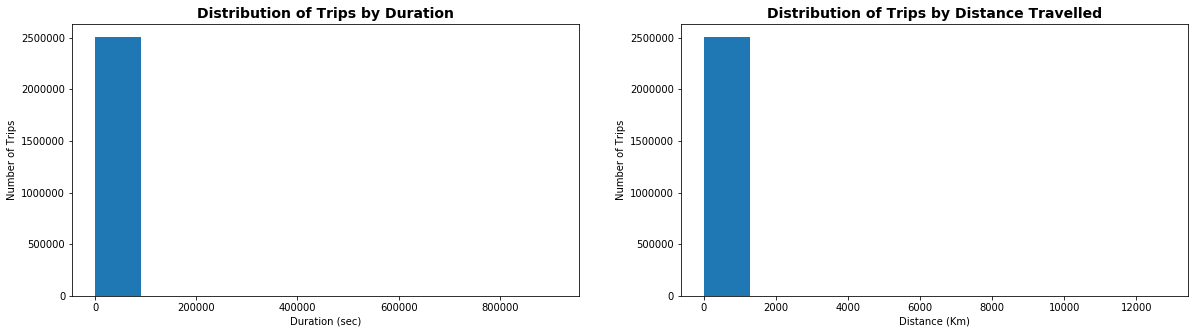

In [19]:
#what is the distribution of trip duration
plt.figure(figsize=[20,5]);

plt.subplot(1,2,1);
plt.hist(data= bike_df, x='duration_sec', color= base_color);
plt.xlabel('Duration (sec)');
plt.ylabel('Number of Trips');
plt.title('Distribution of Trips by Duration', fontsize=14, fontweight='bold');

#what is the distribution of distance travelled
plt.subplot(1,2,2);
plt.hist(data= bike_df, x='distance_km', color= base_color);
plt.xlabel('Distance (Km)');
plt.ylabel('Number of Trips');
plt.title('Distribution of Trips by Distance Travelled', fontsize=14, fontweight='bold');

**Observations**
* We cannot make sense of the charts above, let's apply bins and xlim

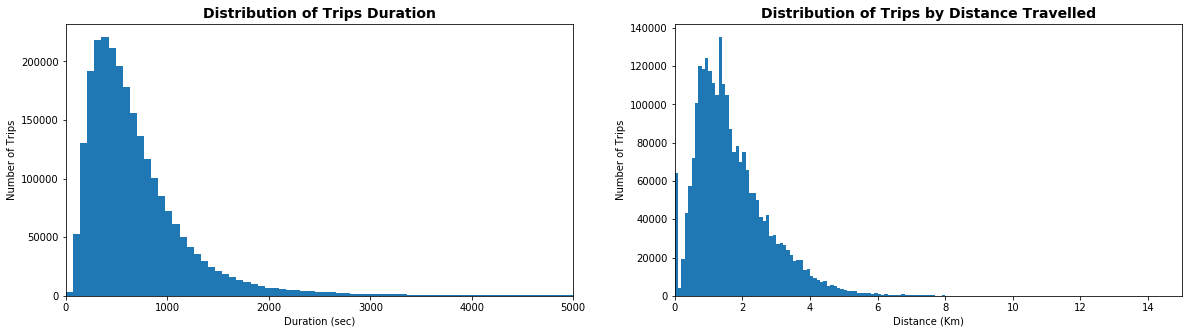

In [20]:
#what is the distribution of trip duration
plt.figure(figsize=[20,5]);
plt.subplot(1,2,1);
bins=np.arange(0, bike_df['duration_sec'].max()+70, 70)
plt.hist(data= bike_df, x='duration_sec', color= base_color, bins=bins);
plt.xlabel('Duration (sec)');
plt.ylabel('Number of Trips');
plt.title('Distribution of Trips Duration', fontsize=14, fontweight='bold');
plt.xlim(0, 5000)

#what is the distribution of distance travelled
plt.subplot(1,2,2);
bins=np.arange(0, bike_df['distance_km'].max()+0.1, 0.1)
plt.hist(data= bike_df, x='distance_km', color= base_color, bins=bins);
plt.xlabel('Distance (Km)');
plt.ylabel('Number of Trips');
plt.title('Distribution of Trips by Distance Travelled', fontsize=14, fontweight='bold');
plt.xlim(0, 15);

**Observations**
* Number of trips generally reduced with increasing duration
* Number of trips generally reduced with increasing distance
* Both distributions are right_skewed

In [21]:
#How long did the average trip take?
#remove outliers before exploring
query_df= bike_df.query('duration_sec <= 3500')
print(f"The average trip took {query_df.duration_sec.mean()} seconds")

#What was the average distance travelled?
#remove outliers before exploring
query2_df= bike_df.query('distance_km <= 9')
print(f"The average distance travelled was {query2_df.distance_km.mean()} kilometers")

The average trip took 685.6042187181832 seconds
The average distance travelled was 1.6972970253852828 kilometers


**Observations**
* The average trip took 685.60 seconds
* The average distance travelled was 1.70 kilometers

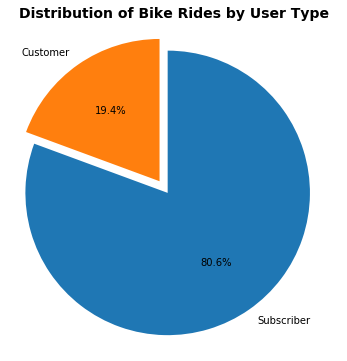

In [22]:
#What is the distribution of bike users by user type (piechart)
plt.figure(figsize=[6,6])
explode= (0.02, 0.08)
sorted_counts=bike_df['user_type'].value_counts()
plt.pie(sorted_counts, labels= sorted_counts.index, explode=explode, autopct='%1.1f%%', startangle=90, 
        shadow= False, counterclock= False);
plt.axis('square');
plt.title('Distribution of Bike Rides by User Type', fontsize=14, fontweight='bold');

**Observations**
* 19.4% of bike rides were taken by customers, while 80.6% were taken by subscribers

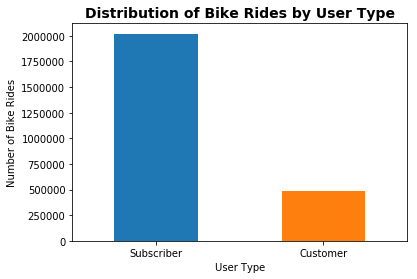

In [23]:
#What is the distribution of bike users by user type (barchart)
bike_df['user_type'].value_counts().plot(kind='bar')
plt.xlabel('User Type');
plt.ylabel('Number of Bike Rides');
plt.title('Distribution of Bike Rides by User Type', fontsize=14, fontweight='bold');
plt.xticks(rotation= 0);

**Observations**
* About 2million rides were taken by subscribers, while approximately 500,000 were taken by customers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In order to explore the time of day, month of year, and day of week most rides were taken, I had to extract the necessary information from the start_time column. Similarly, I used the provided latitude and longitude columns to get the distance of each trip in kilometers. 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to adjust bin size and use the xlim function to make sense of the distribution of trip distance, and trip duration data. After applying bin and xlim, the data distribution became interpretable.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

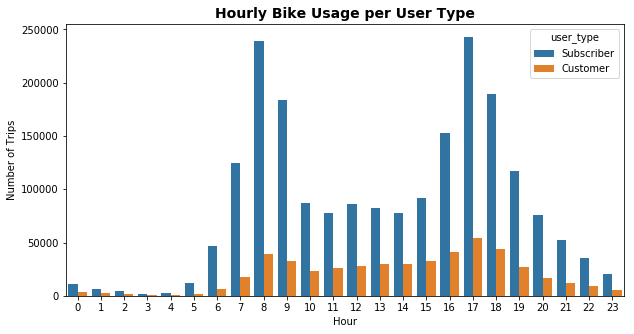

In [24]:
#what is the distribution of hourly bike usage per user type?
plt.figure(figsize=[10,5]);
sb.countplot(data = bike_df, x = 'start_hour', hue = 'user_type');
plt.xlabel('Hour');
plt.ylabel('Number of Trips');
plt.title('Hourly Bike Usage per User Type', fontsize=14, fontweight='bold');

**Observations:**
* Subscribers and customers had most of their trips around 8am and 5pm, lowest number of trips were recorded around 3 to 4am.
* For customers, number of trips generally increased from 5am to 8am, and also increased from 10am to 5pm, then declined afterwards, however, for subscribers, number of trips increased drastically from 3am to 8am, and also increased from 2pm to 5pm, then declined drastically afterwards.

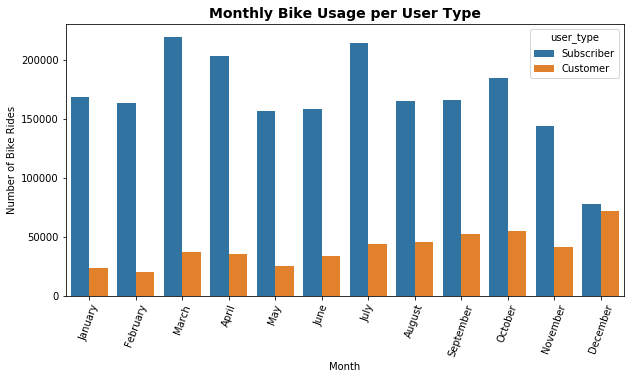

In [25]:
#what is the distribution of monthly bike usage per user type?
plt.figure(figsize=[10,5]);
sb.countplot(data = bike_df, x = 'start_month', hue = 'user_type');
plt.xlabel('Month');
plt.ylabel('Number of Bike Rides');
plt.title('Monthly Bike Usage per User Type', fontsize=14, fontweight='bold');
plt.xticks(rotation=70);

**Observations:**
* Highest number of trips taken by subscribers was observed in March, while lowest number of trips was observed in December.
* For customers, highest number of trips was observed in December, while lowest number of trips was observed in February.

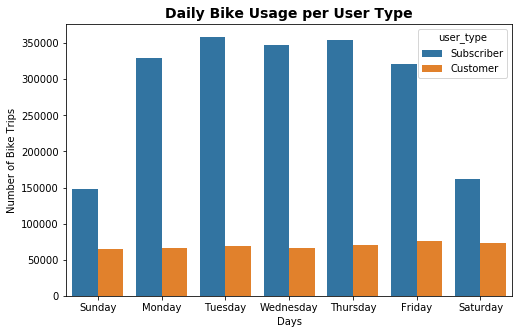

In [26]:
#what is the distribution of daily bike usage per user type?
plt.figure(figsize=[8,5]);
sb.countplot(data = bike_df, x = 'start_day', hue = 'user_type');
plt.xlabel('Days');
plt.ylabel('Number of Bike Trips');
plt.title('Daily Bike Usage per User Type', fontsize=14, fontweight='bold');

**Observations:**
* For subscribers, most bike trips were taken on a Tuesday, and the least number of bike trips were taken on a Sunday.
* For customers, number of bike trips per day did not vary significantly, however, most bike trips were taken on a Friday. 

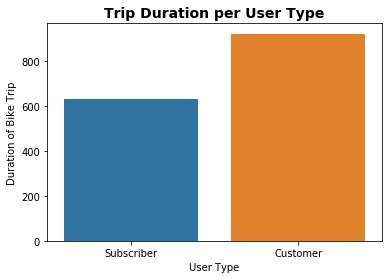

In [27]:
#what is the distribution of trip duration per user type?
sb.barplot(data=query_df, x='user_type', y='duration_sec');
plt.xlabel('User Type');
plt.ylabel('Duration of Bike Trip');
plt.title('Trip Duration per User Type', fontsize=14, fontweight='bold');

**Observations:**
* Subscribers generally had shorter bike trips than customers
* Customers travelled for longer periods than subscribers

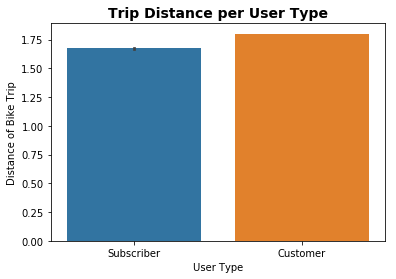

In [28]:
#what is the distribution of trip distance per user type?
sb.barplot(data=query2_df, x='user_type', y='distance_km');
plt.xlabel('User Type');
plt.ylabel('Distance of Bike Trip');
plt.title('Trip Distance per User Type', fontsize=14, fontweight='bold');

**Observations:**
* Difference between average distance travelled by subscribers and customers is not significant, however, customers travelled longer distance on average than subscribers

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


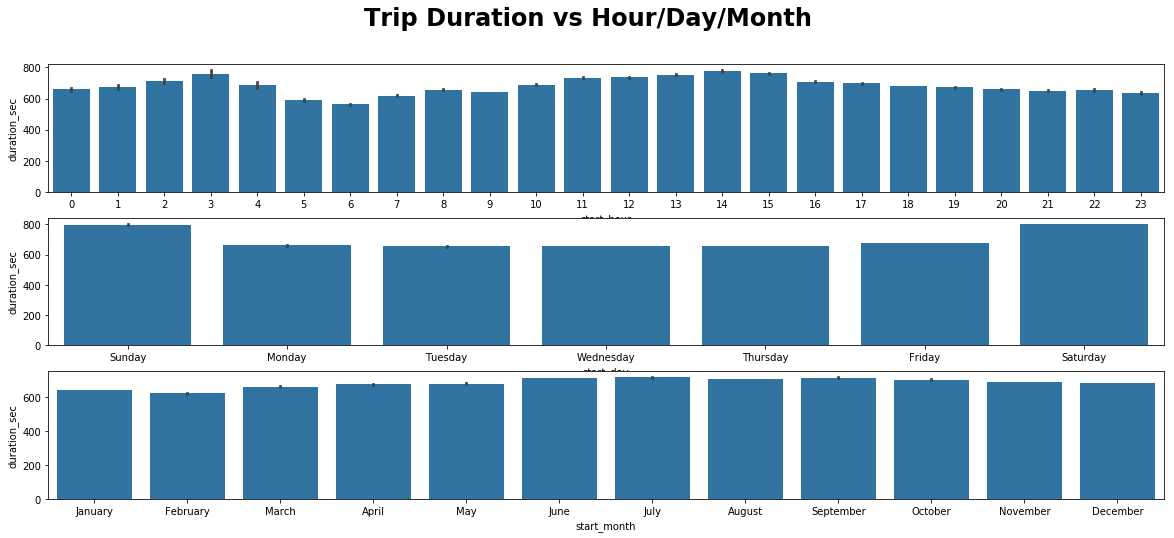

In [29]:
fig, ax = plt.subplots(nrows= 3, figsize= [20, 8])

#what is the distribution of time the trip started by trip duration
sb.barplot(data = query_df, x = 'start_hour', y = 'duration_sec', color = base_color, ax= ax[0]);

#what is the distribution of day of trip by trip duration
query_df['start_day']= query_df['start_day'].astype(day_of_week)
sb.barplot(data=query_df, x='start_day', y = 'duration_sec', color = base_color, ax = ax[1]);

#what is the distribution of month of trip by trip duration
query_df['start_month']= query_df['start_month'].astype(months_of_year);
sb.barplot(data= query_df, x='start_month', y = 'duration_sec', color = base_color, ax = ax[2]);

fig.suptitle('Trip Duration vs Hour/Day/Month', fontsize=24, fontweight='bold');

**Observations:**
* Trips of the longest duration were taken at 2pm, while trips of the shortest duration were taken 6am
* Trips of the longest duration were taken on a Saturday, followed closely by a Sunday
* Trips of the longest duration were taken in July, while trips of the shortest duration were taken in February

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


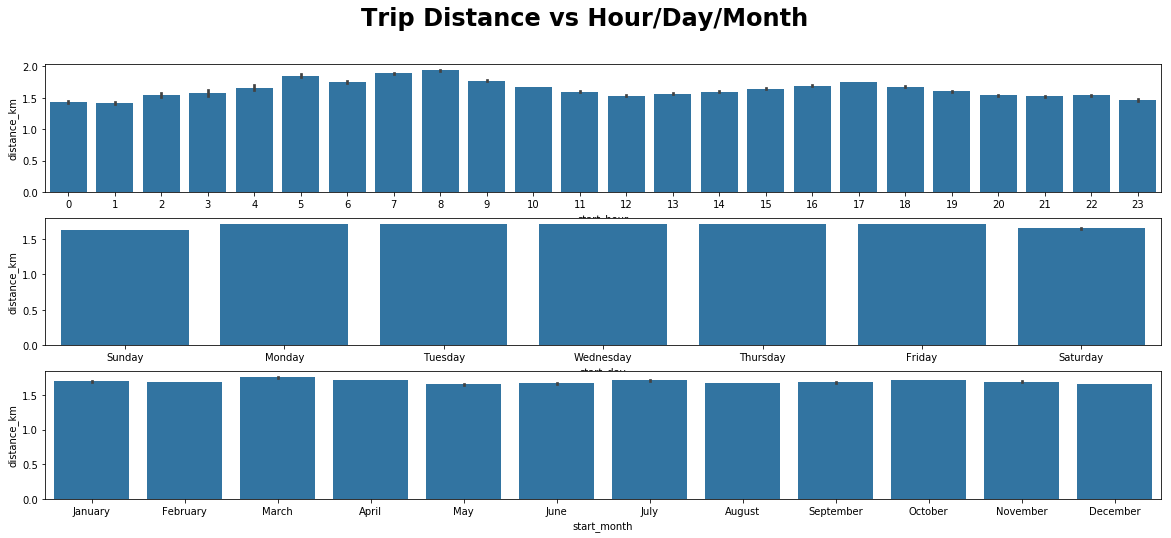

In [30]:
fig, ax = plt.subplots(nrows= 3, figsize= [20, 8])

#what is the distribution of time the trip started by distance covered
sb.barplot(data = query2_df, x = 'start_hour', y = 'distance_km', color = base_color, ax = ax[0]);

#what is the distribution of day of trip by distance covered
query2_df['start_day']= query2_df['start_day'].astype(day_of_week)
sb.barplot(data=query2_df, x='start_day', y = 'distance_km', color = base_color, ax = ax[1]);

#what is the distribution of month of trip by distance covered
query2_df['start_month']= query2_df['start_month'].astype(months_of_year);
sb.barplot(data= query2_df, x='start_month', y = 'distance_km', color = base_color, ax = ax[2]);

fig.suptitle('Trip Distance vs Hour/Day/Month', fontsize=24, fontweight='bold');

**Observations:**
* Trips of the longest distance were taken at 8am, while trips of the shortest distance were taken at 1am
* Overall distance travelled per day did not vary significantly, however, trips of the shortest distance were taken on a Sunday and Saturday
* Trips of the longest distance were taken in March

In [31]:
#what is the average trip duration and distance covered by customers and subscribers?
sub_dist=query2_df.query('user_type == "Subscriber"')
cus_dist=query2_df.query('user_type == "Customer"')
sub_dur=query_df.query('user_type == "Subscriber"')
cus_dur=query_df.query('user_type == "Customer"')
print(f'The average trip duration of subscribers is: {sub_dur.duration_sec.mean()} seconds')
print(f'The average trip duration of customers is: {cus_dur.duration_sec.mean()} seconds')
print(f' The average distance covered by subscribers is: {sub_dist.distance_km.mean()} kilometers')
print(f' The average distance covered by customers is: {cus_dist.distance_km.mean()} kilometers')

The average trip duration of subscribers is: 631.7797997777737 seconds
The average trip duration of customers is: 919.6718386681304 seconds
 The average distance covered by subscribers is: 1.6731597195850152 kilometers
 The average distance covered by customers is: 1.7977335060332544 kilometers


**Observations:**
* The average trip duration of subscribers is: 631.78 seconds
* The average trip duration of customers is: 919.67 seconds
* The average distance covered by subscribers is: 1.67 kilometers
* The average distance covered by customers is: 1.80 kilometers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Although subscribers generally had higher number of bike trips than customers, they travelled for shorter duration and shorter distances compared to customers. 

> For both customers and subscribers, daily number of bike trips peaked at 8am and 5pm

> For subscribers number of daily trips are very high on weekdays, and very low during weekends. For customers however, number of bike trips did not vary significantly from day to day. 

> Highest number of trips taken by subscribers was observed in March, while lowest number of trips was observed in December. For customers, highest number of trips was observed in December, while lowest number of trips was observed in February.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> it is interesting to see that eventhough most bike trips are taken on weekdays, weekend trips actually take longer duration

## Multivariate Exploration

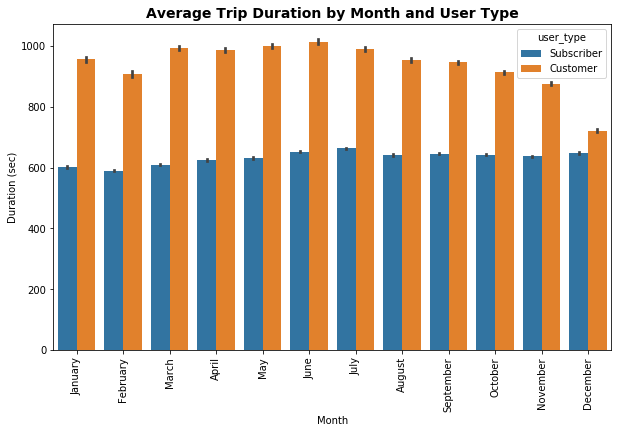

In [32]:
#month vs duration vs user_type
plt.figure(figsize=[10,6]);
sb.barplot(data=query_df, x='start_month', y='duration_sec', hue='user_type');
plt.xticks(rotation= 90);
plt.xlabel('Month');
plt.ylabel('Duration (sec)');
plt.title('Average Trip Duration by Month and User Type', fontweight='bold', fontsize=14);

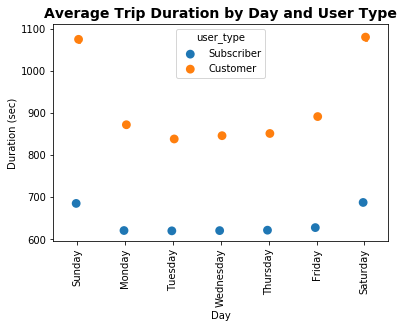

In [33]:
#day vs duration vs user_type
sb.pointplot(data=query_df, x='start_day', y='duration_sec', hue='user_type', linestyles='', dodge= True);
plt.xticks(rotation= 90);
plt.xlabel('Day');
plt.ylabel('Duration (sec)');
plt.title('Average Trip Duration by Day and User Type', fontweight='bold', fontsize=14);

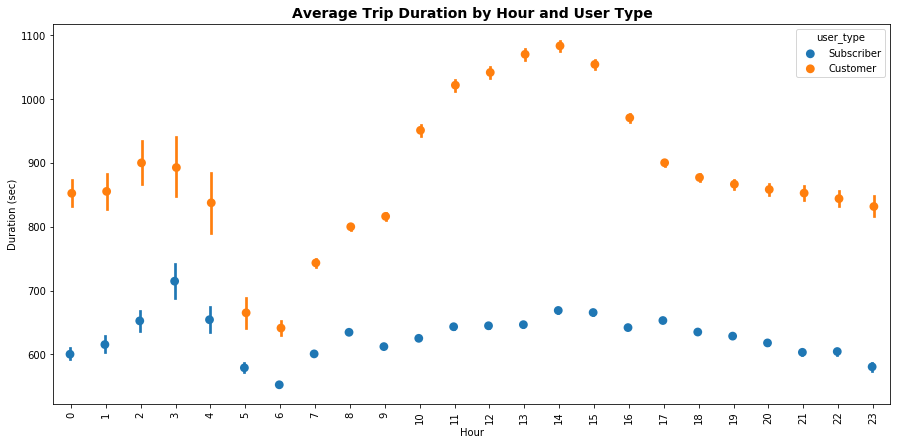

In [34]:
#hour vs duration vs user_type
plt.figure(figsize=[15,7]);
sb.pointplot(data=query_df, x='start_hour', y='duration_sec', hue='user_type', linestyles='', dodge= True);
plt.xticks(rotation= 90);
plt.xlabel('Hour');
plt.ylabel('Duration (sec)');
plt.title('Average Trip Duration by Hour and User Type', fontweight='bold', fontsize=14);

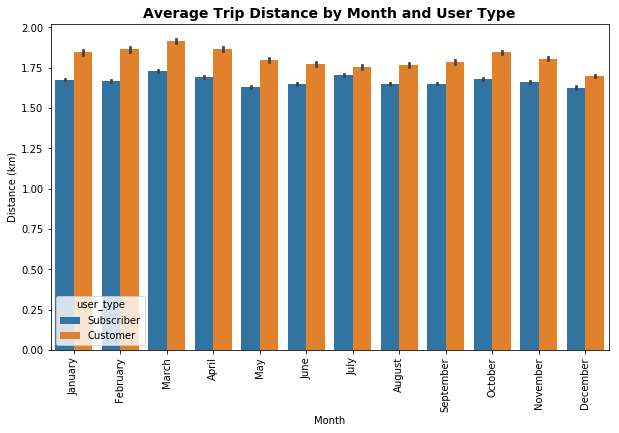

In [35]:
#month vs distance vs user_type
plt.figure(figsize=[10,6]);
sb.barplot(data=query2_df, x='start_month', y='distance_km', hue='user_type');
plt.xticks(rotation= 90);
plt.xlabel('Month');
plt.ylabel('Distance (km)');
plt.title('Average Trip Distance by Month and User Type', fontweight='bold', fontsize=14);

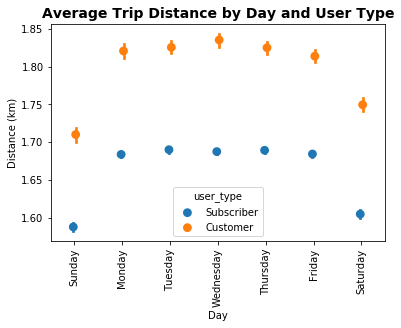

In [36]:
#day vs distance vs user_type
sb.pointplot(data=query2_df, x='start_day', y='distance_km', hue='user_type', linestyles='', dodge= True);
plt.xticks(rotation= 90);
plt.xlabel('Day');
plt.ylabel('Distance (km)');
plt.title('Average Trip Distance by Day and User Type', fontweight='bold', fontsize=14);

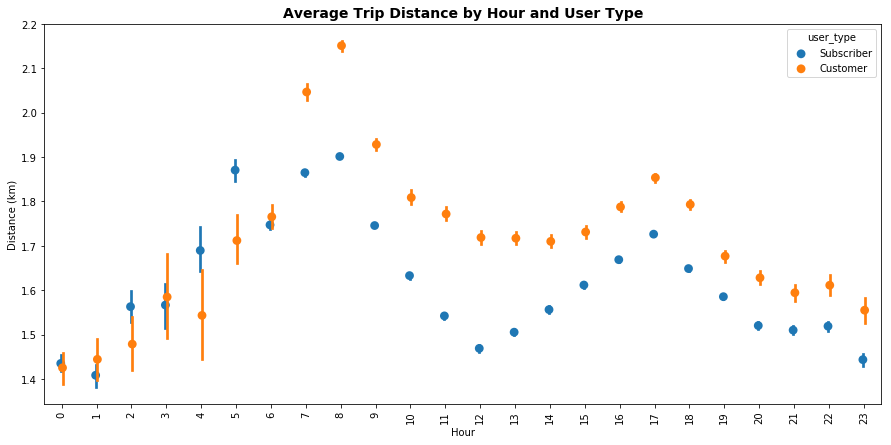

In [37]:
#hour vs distance vs user_type
plt.figure(figsize=[15,7]);
sb.pointplot(data=query2_df, x='start_hour', y='distance_km', hue='user_type', linestyles='', dodge= True);
plt.xticks(rotation= 90);
plt.xlabel('Hour');
plt.ylabel('Distance (km)');
plt.title('Average Trip Distance by Hour and User Type', fontweight='bold', fontsize=14);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Multivariate analysis of this dataset further strengthened many observations reported earlier. Customers generally travelled longer periods by hour, day, and month compared to subscribers. Similarly, customers generally travelled longer distance by month and day compared to subscribers. However, from midnight to 6am, distance travelled by subscribers were either higher than that travelled by customers, or almost equal to. 

### Were there any interesting or surprising interactions between features?

> It is interesting to see that eventhough most bike trips were taken on weekdays, longest bike trips in terms of duration were actually taken on weekends.